Objetivo: Resolução lista 1 de otimização e programação linear

In [1]:
import Pkg

In [2]:
# Pkg.add("Plots")    # Adding plots package
# Pkg.add("JuMP")    # Adding plots package
# Pkg.add("GLPK")    # Adding plots package
# Pkg.add("CSV")    # Adding plots package
# Pkg.add("DataFrames")    # Adding plots package
# Pkg.add("GLM")    # Linear Regression package
# HiGHS need to explicity pass the version. Otherwise its installing the older version
# Pkg.add(Pkg.PackageSpec(;name="HiGHS", version="1.9.0"))
# Pkg.add("QuantReg")
# Pkg.add("MosekTools")
# Pkg.add("Ipopt")
# Pkg.add("Random")

In [3]:
using Plots
using JuMP
using GLPK
using CSV
using DataFrames
using GLM
using HiGHS
# using QuantReg
# Different optimizer to use in quadratic optimization problemns
# using MosekTools
using Ipopt
using Random
using SparseArrays

# Inicializa o backend dos plots
gr()

Plots.GRBackend()

## Summary:


### Problema 3 -

In [4]:
A = [
2 1 1 0;
1 2 0 1
]
b = [
4; 4
]
c = [4 3 0 0]

1×4 Matrix{Int64}:
 4  3  0  0

In [5]:
# Dicionario 1 -
Nbase = [1, 2] 
base = [3, 4]

N = A[:,Nbase]
B = A[:,base]
cn = c[:,Nbase]
cb = c[:,base]
print(N, B, cn, cb)
inv(B)*b, inv(B)*N, cb*inv(B)*b, cn - cb*inv(B)*N

[2 1; 1 2][1 0; 0 1][4 3][0 0]

([4.0, 4.0], [2.0 1.0; 1.0 2.0], [0.0], [4.0 3.0])

In [6]:
cb*inv(B)*b, cn - cb*inv(B)*N

([0.0], [4.0 3.0])

In [7]:
# Dicionario 2 -
Nbase = [1, 3] 
base = [2, 4]

N = A[:,Nbase]
B = A[:,base]
cn = c[:,Nbase]
cb = c[:,base]
print(N, B, cn, cb)
inv(B)*b, inv(B)*N, cb*inv(B)*b, cn - cb*inv(B)*N

[2 1; 1 0][1 0; 2 1][4 0][3 0]

([4.0, -4.0], [2.0 1.0; -3.0 -2.0], [12.0], [-2.0 -3.0])

In [8]:
# Dicionario 3 -
Nbase = [1, 4] 
base = [2, 3]

N = A[:,Nbase]
B = A[:,base]
cn = c[:,Nbase]
cb = c[:,base]
print(N, B, cn, cb)
inv(B)*b, inv(B)*N, cb*inv(B)*b, cn - cb*inv(B)*N

[2 0; 1 1][1 1; 2 0][4 0][3 0]

([2.0, 2.0], [0.5 0.5; 1.5 -0.5], [6.0], [2.5 -1.5])

In [9]:
# Dicionario 4 -
Nbase = [3, 4] 
base = [1, 2]

N = A[:,Nbase]
B = A[:,base]
cn = c[:,Nbase]
cb = c[:,base]
print(N, B, cn, cb)
inv(B)*b, inv(B)*N, cb*inv(B)*b, cn - cb*inv(B)*N

[1 0; 0 1][2 1; 1 2][0 0][4 3]

([1.3333333333333333, 1.3333333333333333], [0.6666666666666666 -0.3333333333333333; -0.3333333333333333 0.6666666666666666], [9.333333333333332], [-1.6666666666666665 -0.6666666666666667])

In [10]:
# Dicionario 5 -
Nbase = [2, 3] 
base = [1, 4]

N = A[:,Nbase]
B = A[:,base]
cn = c[:,Nbase]
cb = c[:,base]
print(N, B, cn, cb)
inv(B)*b, inv(B)*N, cb*inv(B)*b, cn - cb*inv(B)*N

[1 1; 2 0][2 0; 1 1][3 0][4 0]

([2.0, 2.0], [0.5 0.5; 1.5 -0.5], [8.0], [1.0 -2.0])

In [11]:
# Dicionario 6 -
Nbase = [2, 4] 
base = [1, 3]

N = A[:,Nbase]
B = A[:,base]
cn = c[:,Nbase]
cb = c[:,base]
print(N, B, cn, cb)
inv(B)*b, inv(B)*N, cb*inv(B)*b, cn - cb*inv(B)*N

[1 0; 2 1][2 1; 1 0][3 0][4 0]

([4.0, -4.0], [2.0 1.0; -3.0 -2.0], [16.0], [-5.0 -4.0])

# Problema 4

In [12]:
alpha=1

1

In [13]:
function func_constraint_1(x1, alpha) 
    x2 = 4*alpha - 2*x1
end

function func_constraint_2(x1, alpha) 
    x2 = 2*alpha - x1/2
end

func_constraint_2 (generic function with 1 method)

In [14]:
function bouderies_definition(alpha)
    x_min, x_max = 0, 10
    x1_const_1 = [x_min:0.1:x_max;]
    x1_const_2 = [x_min:0.1:x_max;]

    x2_const_1 = func_constraint_1.(x1_const_1, alpha)
    x2_const_2 = func_constraint_2.(x1_const_2, alpha)

    # Create the points vector
    const_1 = [(x1_const_1[i], x2_const_1[i]) for i = 1:size(x2_const_1)[1]]
    const_2 = [(x1_const_2[i], x2_const_2[i]) for i = 1:size(x2_const_1)[1]]
    # Filter only the positives
    new_const_1 = [[i, j] for (i,j) in const_1 if ( i >=0 && j >= 0) ]
    new_const_1 = mapreduce(permutedims, vcat, new_const_1)
    new_const_2 = [[i, j] for (i,j) in const_2 if ( i >=0 && j >= 0) ]
    new_const_2 = mapreduce(permutedims, vcat, new_const_2)

    # return constraints
    return new_const_1, new_const_2
end

bouderies_definition (generic function with 1 method)

Plotting the Scatter

In [15]:
Pkg.add("Images")
using Images

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
Precompiling project...
  ✓ MosekTools
  1 dependency successfully precompiled in 27 seconds. 381 already precompiled.


In [16]:
using Images

In [17]:
color = RGB(rand(3)...)

Interation 1
Interation 2
Interation 3
Interation 4
Interation 5


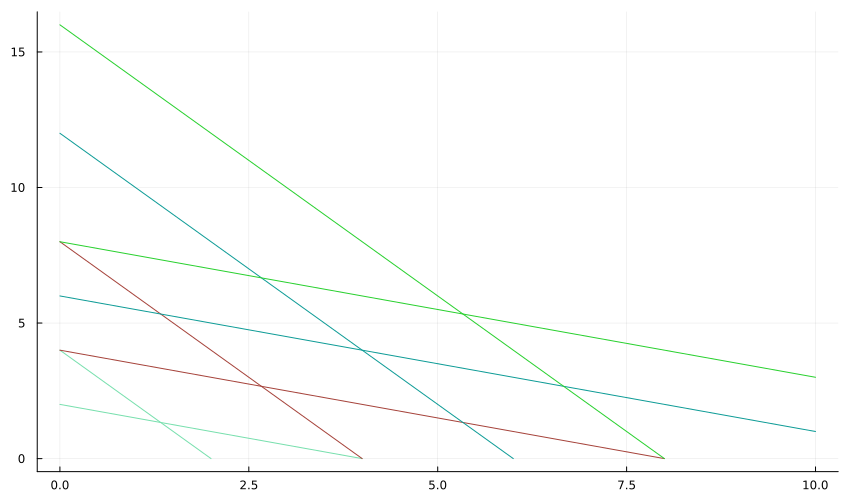

In [18]:
i=0
for alpha in 0:4
    i += 1
    print("Interation ", i)
    print("\n")
    new_const_1, new_const_2 = bouderies_definition(alpha)

    color = RGB(rand(3)...)
    
    if i == 1
        p = plot(new_const_1[:,1], new_const_1[:,2], label="", color=color)
        p = plot!(new_const_2[:,1], new_const_2[:,2], label="", color=color)
    else    
        p = plot!(new_const_1[:,1], new_const_1[:,2], label="", color=color)
        p = plot!(new_const_2[:,1], new_const_2[:,2], label="", color=color)
    end
end

p = plot!(size=(850,500))
display(p)

In [19]:
function linear_reg_solver(alpha)
    m = Model(GLPK.Optimizer)
    @variable(m, x1 >= 0)
    @variable(m, x2 >= 0)
    # @variable(m, x3 >= 0)
    # @variable(m, x4 >= 0)
    @constraint(m, 2*x1 + x2 <= 4*alpha)
    @constraint(m, x1 + 2*x2 <= 4*alpha)
    @objective(m, Max, 4*x1 + 3*x2) 
    optimize!(m)
    return m, x1, x2
end

linear_reg_solver (generic function with 1 method)

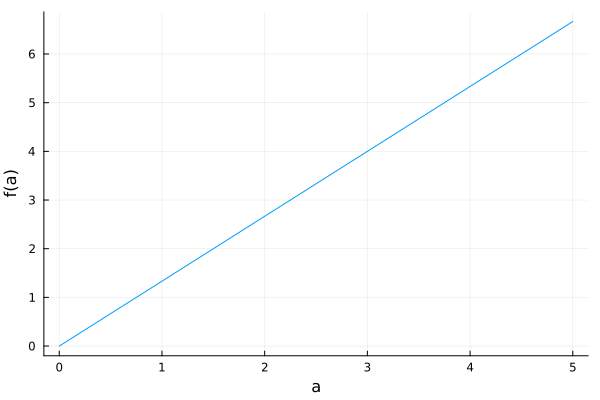

In [20]:
# Solve the problem for different values of alpha
alphas = [0:0.1:5;]
x = zeros(0)

for alpha in alphas
    m, x1, x2 = linear_reg_solver(alpha)
    x = append!(x, value(x1))
end

plot(alphas, x, xlabel = "a", ylabel="f(a)", label="")

In [21]:
x[4]/(alphas[4]*x[11])

1.0

In [22]:
x[5]/(alphas[5])

1.3333333333333335

A relação entre f(alfa) e alfa é sempre igual f(1). Portanto a relação entre f(alfa)/alfa / f(1) e igual a 1.

Resolvendo com o modelo de regressão linear

# Problema 6 -

In [29]:
import Pkg

# Pkg.add("Random")

using Random
using SparseArrays

# Simplex fase 2
function simplex_fase2(A,b,c,Nbase,Bbase,max_iter, tolerance)
    m, n = size(A)
    k = n - m # número de variáveis não básicas (igual ao número de variáveis menos o número de restrições, 
    # sendo que cada restrição é uma variável básica)
    
    iter = 0
    status = -1    # não iniciado
    # Começo do loop
    while(iter<=max_iter)
        iter+=1
        println("iter:",iter)
        #B = view(A,:,Bbase)
        #N = view(A,:,Nbase)
        
        B = 1.0*A[:,Bbase]
        N = 1.0*A[:,Nbase]
        # Colocar os views, view evita a criação de uma nova matriz em outro bloco de memoria
        #apenas faz referencia aos endereco de memoria da matriz original
        cB = 1.0*c[Bbase]
        cN = 1.0*c[Nbase]
    
        println("B:",B)
        println("N:",N)
        println("Nbase:",Nbase)
        println("Bbase:",Bbase)

        x = zeros(n)
        
        xB = inv(B)*b
        println("xb", xB)
        x[Bbase] = xB
        println("x", x)
        if minimum(xB) < 0
            println("solução inicial inviável encontrada")
            return NaN,[],status,iter
        end
        # Calcular o custo reduzido
        y = (cB')*inv(B)
        println("y", y)
        cred = cN' - y*N
        println("Custo Reduzido:", cred)
        z = y*b
        println("Custo (z):", z)
        v,j = findmax(cred') #j é a variavel não básica que candidata a entrada na base
        if v <= 0
            println("Ótimo Encontrado")
            status = 1
            x = zeros(n)
            x[Bbase] = xB
            return z,x,status,iter,Bbase,Nbase
        end
        #troca de base
        dB = B\N[:,j]
        r = Inf
        i = 0

        for ii in 1:m
            if dB[ii] > 0 && xB[ii]/dB[ii] < r
                r = xB[ii]/dB[ii]
                i = ii
            end
        end

        #verificar se o problema é ilimitado
        if i == 0
            status = 0 # problema ilimitado
            println("ilimitado")
            return Inf,[], status,iter, Bbase, Nbase
        end

        # Atualizar a base

        aux = Bbase[i]
        Bbase[i] = Nbase[j]
        Nbase[j] = aux

        # fim do loop
    end
    return NaN,[],status,iter
end

# Testes
function tests_main()

    max_iter =1000
    # Problema da produção original
    print("Teste do algoritmo para o: Problema da produção \n")
    A = 1.0*[
        2 1 1 0; 
        1 2 0 1
    ]
    c = 1.0*[
        4; 3 ; 0; 0
    ]
    b= 1.0*[
        4;
        4
    ]
    m, n = size(A)
    k = n - m
    Nbase = collect(1:k)
    Bbase = collect(k+1:n)
    z, x, status, iter, Bbase, Nbase = simplex_fase2(A,b,c,Nbase,Bbase,max_iter, 1)
    print(repeat("-", 200), "\n")
    
    print("Teste do algoritmo para o: Problema ilimitado \n")
    # Problema ilimitado
    A = 1.0*[
        1 -1 1 0; 
        1 -1 0 -1
    ]
    c = 1.0*[
        2; 1 ; 0; 0
    ]
    b= 1.0*[
        1;
        -1
    ]
    m, n = size(A)
    k = n - m
    Nbase = collect(1:k)
    Bbase = collect(k+1:n)
    z, x, status, iter, Bbase, Nbase = simplex_fase2(A,b,c,Nbase,Bbase,max_iter, 1)
    print(repeat("-", 200), "\n")
    
    print("Teste do algoritmo para o: Problema da produção 10 vars \n")
    # Problema producao aumentado - 10 variaveis
    Random.seed!(222)   # set the seed to not generate different results in every execution
    A = rand([1, 2, 3, 4, 5], 2, 10)
    A = 1.0*hcat(A, [1 0 ; 0 1])
    c = rand([1, 2, 3, 4, 5], 10, 1)
    c = 1.0*vcat(c, [0; 0])
    b= 1.0*[
        100;
        20
    ]
    m, n = size(A)
    k = n - m
    Nbase = collect(1:k)
    Bbase = collect(k+1:n)
    z, x, status, iter, Bbase, Nbase = simplex_fase2(A,b,c,Nbase,Bbase,max_iter, 1)
    print(repeat("-", 200), "\n")
    
    print("Teste do algoritmo para o: Problema da produção 100 vars \n")
    # Problema producao aumentado - 100 variaveis
    Random.seed!(222)   # set the seed to not generate different results in every execution
    A = rand([1, 2, 3, 4, 5], 2, 100)
    A = 1.0*hcat(A, [1 0 ; 0 1])
    c = rand([1, 2, 3, 4, 5], 100, 1)
    c = 1.0*vcat(c, [0; 0])
    b= 1.0*[
        100;
        20
    ]
    m, n = size(A)
    k = n - m
    Nbase = collect(1:k)
    Bbase = collect(k+1:n)
    z, x, status, iter, Bbase, Nbase = simplex_fase2(A,b,c,Nbase,Bbase,max_iter, 1)
end

tests_main()

Teste do algoritmo para o: Problema da produção 
iter:1
B:[1.0 0.0; 0.0 1.0]
N:[2.0 1.0; 1.0 2.0]
Nbase:[1, 2]
Bbase:[3, 4]
xb[4.0, 4.0]
x[0.0, 0.0, 4.0, 4.0]
y[0.0 0.0]
Custo Reduzido:[4.0 3.0]
Custo (z):0.0
iter:2
B:[2.0 0.0; 1.0 1.0]
N:[1.0 1.0; 0.0 2.0]
Nbase:[3, 2]
Bbase:[1, 4]
xb[2.0, 2.0]
x[2.0, 0.0, 0.0, 2.0]
y[2.0 0.0]
Custo Reduzido:[-2.0 1.0]
Custo (z):8.0
iter:3
B:[2.0 1.0; 1.0 2.0]
N:[1.0 0.0; 0.0 1.0]
Nbase:[3, 4]
Bbase:[1, 2]
xb[1.3333333333333333, 1.3333333333333333]
x[1.3333333333333333, 1.3333333333333333, 0.0, 0.0]
y[1.6666666666666665 0.6666666666666667]
Custo Reduzido:[-1.6666666666666665 -0.6666666666666667]
Custo (z):9.333333333333332
Ótimo Encontrado
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Teste do algoritmo para o: Problema ilimitado 
iter:1
B:[1.0 0.0; 0.0 -1.0]
N:[1.0 -1.0; 1.0 -1.0]
Nbase:[1, 2]
Bbas

(100.0, [0.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 60.0, 0.0], 1, 3, [101, 4], [1, 102, 3, 2, 5, 6, 7, 8, 9, 10  …  91, 92, 93, 94, 95, 96, 97, 98, 99, 100])

In [30]:
# Testes
function tests_main()

    max_iter =1000
    # Problema da produção original
    print("Teste do algoritmo para o: Problema da produção \n")
    A = 1.0*[
        2 1 1 0; 
        1 2 0 1
    ]
    c = 1.0*[
        4; 3 ; 0; 0
    ]
    b= 1.0*[
        4;
        4
    ]
    m, n = size(A)
    k = n - m
    Nbase = collect(1:k)
    Bbase = collect(k+1:n)
    z, x, status, iter, Bbase, Nbase = simplex_fase2(A,b,c,Nbase,Bbase,max_iter, 1)
    print(repeat("-", 200), "\n")
    
    print("Teste do algoritmo para o: Problema ilimitado \n")
    # Problema ilimitado
    A = 1.0*[
        1 -1 1 0; 
        1 -1 0 -1
    ]
    c = 1.0*[
        2; 1 ; 0; 0
    ]
    b= 1.0*[
        1;
        -1
    ]
    m, n = size(A)
    k = n - m
    Nbase = collect(1:k)
    Bbase = collect(k+1:n)
    z, x, status, iter, Bbase, Nbase = simplex_fase2(A,b,c,Nbase,Bbase,max_iter, 1)
    print(repeat("-", 200), "\n")
    
    print("Teste do algoritmo para o: Problema da produção 10 vars \n")
    # Problema producao aumentado - 10 variaveis
    Random.seed!(222)   # set the seed to not generate different results in every execution
    A = rand([1, 2, 3, 4, 5], 2, 10)
    A = 1.0*hcat(A, [1 0 ; 0 1])
    c = rand([1, 2, 3, 4, 5], 10, 1)
    c = 1.0*vcat(c, [0; 0])
    b= 1.0*[
        100;
        20
    ]
    m, n = size(A)
    k = n - m
    Nbase = collect(1:k)
    Bbase = collect(k+1:n)
    z, x, status, iter, Bbase, Nbase = simplex_fase2(A,b,c,Nbase,Bbase,max_iter, 1)
    print(repeat("-", 200), "\n")
    
    print("Teste do algoritmo para o: Problema da produção 100 vars \n")
    # Problema producao aumentado - 100 variaveis
    Random.seed!(222)   # set the seed to not generate different results in every execution
    A = rand([1, 2, 3, 4, 5], 2, 100)
    A = 1.0*hcat(A, [1 0 ; 0 1])
    c = rand([1, 2, 3, 4, 5], 100, 1)
    c = 1.0*vcat(c, [0; 0])
    b= 1.0*[
        100;
        20
    ]
    m, n = size(A)
    k = n - m
    Nbase = collect(1:k)
    Bbase = collect(k+1:n)
    z, x, status, iter, Bbase, Nbase = simplex_fase2(A,b,c,Nbase,Bbase,max_iter, 1)
end

tests_main (generic function with 1 method)

In [31]:
tests_main()

Teste do algoritmo para o: Problema da produção 
iter:1
B:[1.0 0.0; 0.0 1.0]
N:[2.0 1.0; 1.0 2.0]
Nbase:[1, 2]
Bbase:[3, 4]
xb[4.0, 4.0]
x[0.0, 0.0, 4.0, 4.0]
y[0.0 0.0]
Custo Reduzido:[4.0 3.0]
Custo (z):0.0
iter:2
B:[2.0 0.0; 1.0 1.0]
N:[1.0 1.0; 0.0 2.0]
Nbase:[3, 2]
Bbase:[1, 4]
xb[2.0, 2.0]
x[2.0, 0.0, 0.0, 2.0]
y[2.0 0.0]
Custo Reduzido:[-2.0 1.0]
Custo (z):8.0
iter:3
B:[2.0 1.0; 1.0 2.0]
N:[1.0 0.0; 0.0 1.0]
Nbase:[3, 4]
Bbase:[1, 2]
xb[1.3333333333333333, 1.3333333333333333]
x[1.3333333333333333, 1.3333333333333333, 0.0, 0.0]
y[1.6666666666666665 0.6666666666666667]
Custo Reduzido:[-1.6666666666666665 -0.6666666666666667]
Custo (z):9.333333333333332
Ótimo Encontrado
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Teste do algoritmo para o: Problema ilimitado 
iter:1
B:[1.0 0.0; 0.0 -1.0]
N:[1.0 -1.0; 1.0 -1.0]
Nbase:[1, 2]
Bbas

(100.0, [0.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 60.0, 0.0], 1, 3, [101, 4], [1, 102, 3, 2, 5, 6, 7, 8, 9, 10  …  91, 92, 93, 94, 95, 96, 97, 98, 99, 100])

# Problema 7

In [17]:
function func(x1, lambda_1, lambda_2)
    # (2 + lambda_1)*x1 + (1 +lambda_2)*x2 = 4    # function
    x2 = ( 4 - (2 + lambda_1)*x1 ) / (1 + lambda_2)
    return x2
end
function func_1(x1)
    x2 = 2 - x1/2
    return x2
end

func_1 (generic function with 1 method)

In [6]:
x1 = [0:0.1:10;]

101-element Vector{Float64}:
  0.0
  0.1
  0.2
  0.3
  0.4
  0.5
  0.6
  0.7
  0.8
  0.9
  1.0
  1.1
  1.2
  ⋮
  8.9
  9.0
  9.1
  9.2
  9.3
  9.4
  9.5
  9.6
  9.7
  9.8
  9.9
 10.0

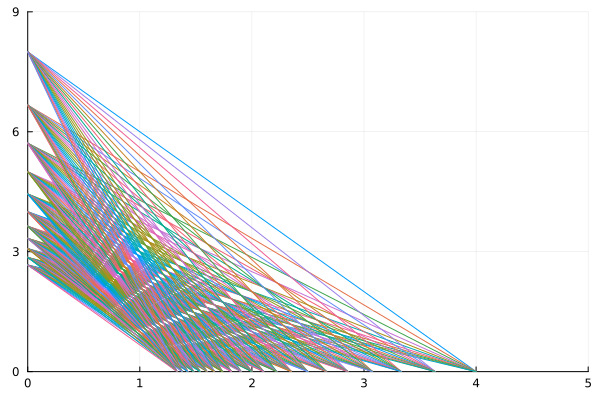

In [25]:
# Plot
i = 0
for lambda_1 in range(start = -1, stop=1, step=0.1)
    for lambda_2 in range(start = -0.5, stop=0.5, step=0.1)
        i += 1
        x2 = func.(x1, lambda_1, lambda_2)
        # println(lambda_2)
        if i == 1
            p = plot(x1, x2, label=false, ylimits=(0,9), xlimits=(0,5))
        else
            p = plot!(x1, x2, label=false, ylimits=(0,9), xlimits=(0,5))
        end
    end
end
display(p)

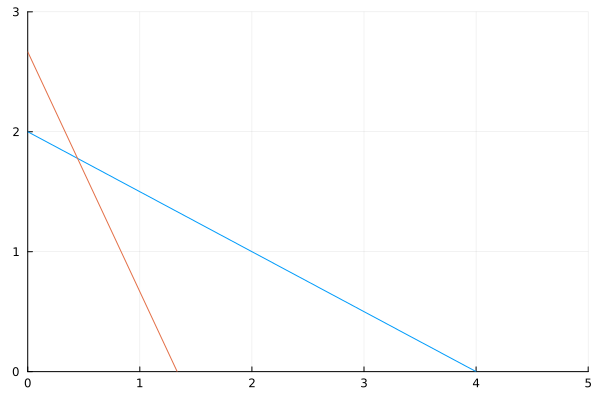

In [24]:
# Plot constraint 2
x2 = func_1.(x1)
p = plot(x1, x2, label=false, ylimits=(0,3), xlimits=(0,5))
# Plot constraint 1
x2_worse = func.(x1, 1, 0.5)
p = plot!(x1, x2_worse, label=false, ylimits=(0,3), xlimits=(0,5))
display(p)